In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss

### 3 components

In [3]:
X1=np.random.normal(5,np.sqrt(0.01),100)
X2=np.random.normal(2.5,np.sqrt(0.2),50)
X3=np.random.normal(0,np.sqrt(2),25)
X=np.array(list(X1)+list(X2)+list(X3))

### 4 components

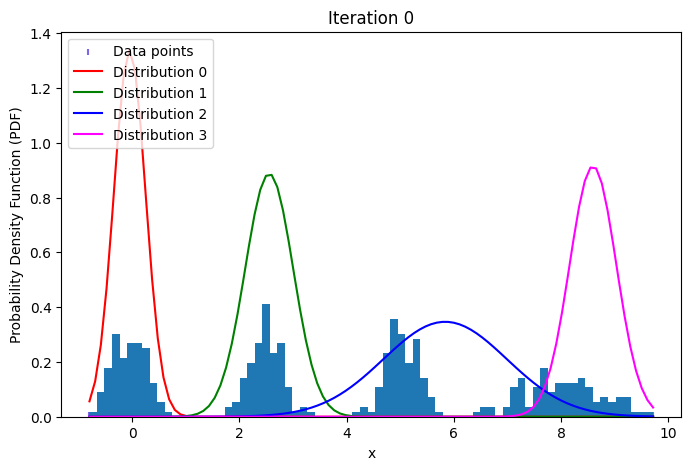

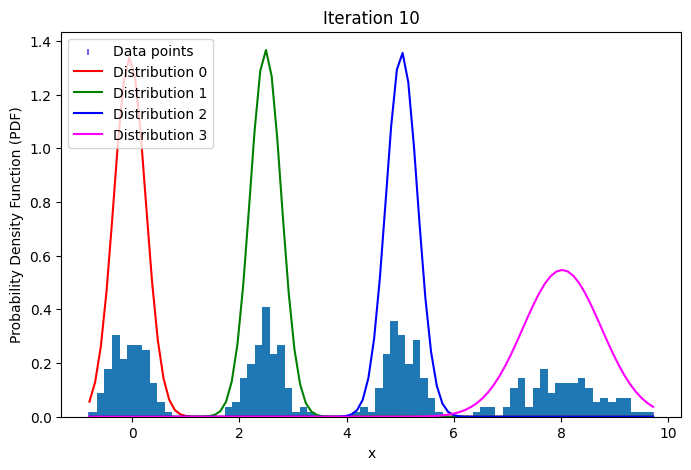

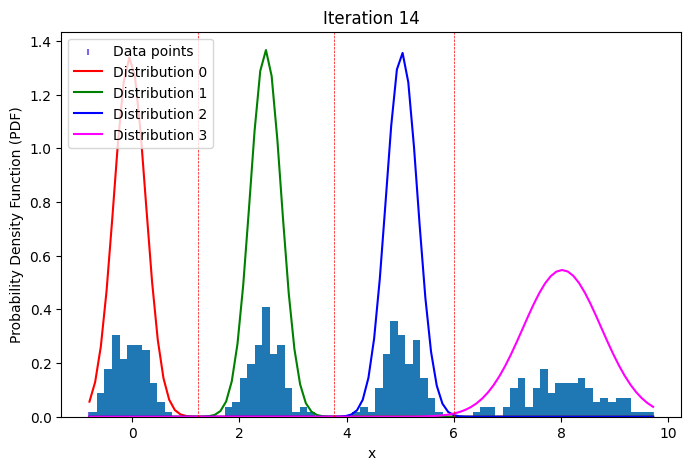

In [4]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold1(D,4,em)
gauss.PlotGMM(D,em,10,t,[])

### Loading KIR data

In [2]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

In [3]:
a=list(B)
KIR=a[1:]
KIR.remove("KIR3DL3")

In [4]:
KIR

['KIR3DP1',
 'KIR2DS5',
 'KIR2DL3',
 'KIR2DP1',
 'KIR2DS3',
 'KIR2DS2',
 'KIR2DL4',
 'KIR3DL1',
 'KIR3DS1',
 'KIR2DL2',
 'KIR3DL2',
 'KIR2DS4',
 'KIR2DL1',
 'KIR2DS1',
 'KIR2DL5']

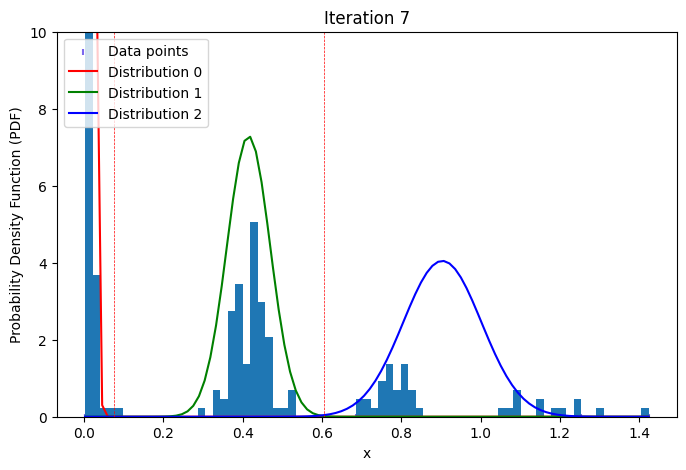

In [5]:
KIR2DL5=B["KIR2DL5"].to_numpy()

em_2DL5,pxj_2DL5=gauss.EMGMM_varconstraint(KIR2DL5,gauss.BIC_gmm(KIR2DL5),[])
gauss.check_prob2(pxj_2DL5,em_2DL5)
gauss.PlotGMM(KIR2DL5,em_2DL5,10,gauss.findThreshold2(em_2DL5),10)

KIR3DP1


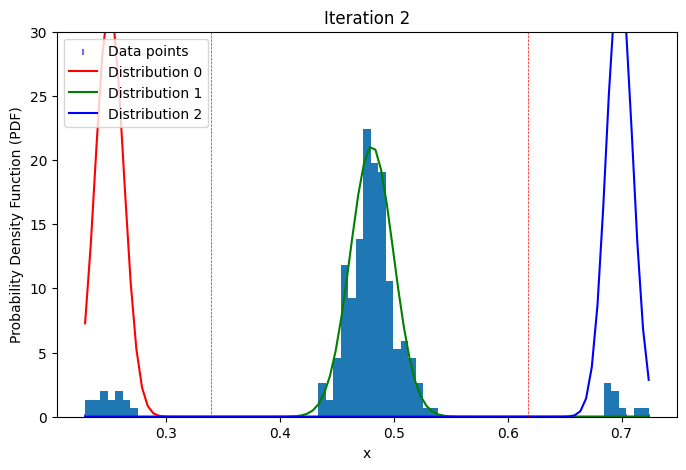

KIR3DP1 [0.3394181192535229, 0.618116935397961]
KIR2DS5


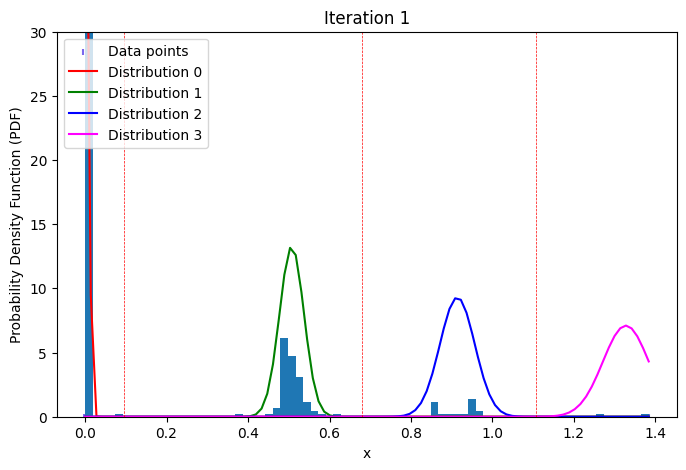

KIR2DS5 [0.09518455245206578, 0.6803895784776066, 1.1068393847216758]
KIR2DL3


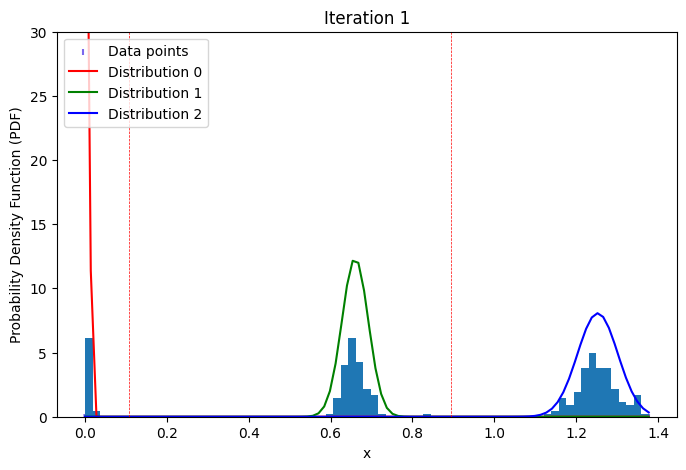

KIR2DL3 [0.10619147769714202, 0.8942923606439794]
KIR2DP1


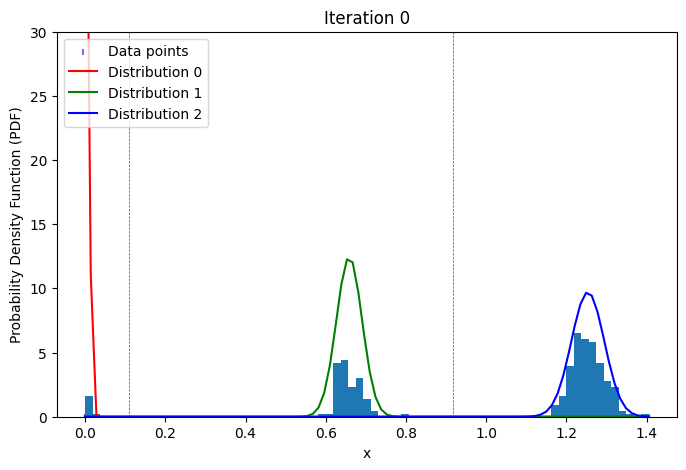

KIR2DP1 [0.10906686354171682, 0.9179859366802242]
KIR2DS3


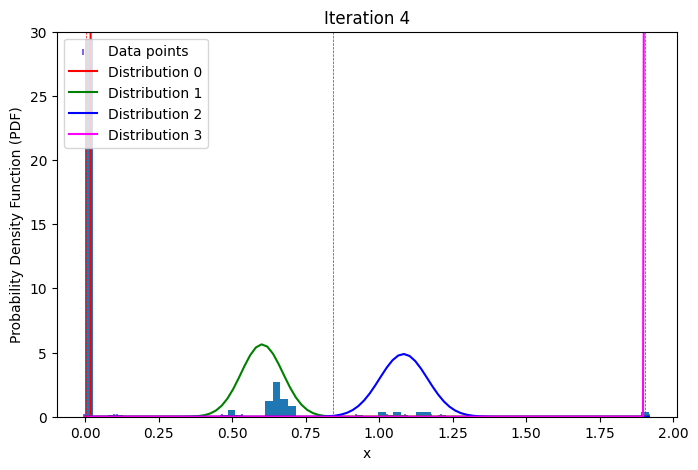

KIR2DS3 [0.002775737143652302, 0.8421704246284241, 1.9046987445559485]
KIR2DS2


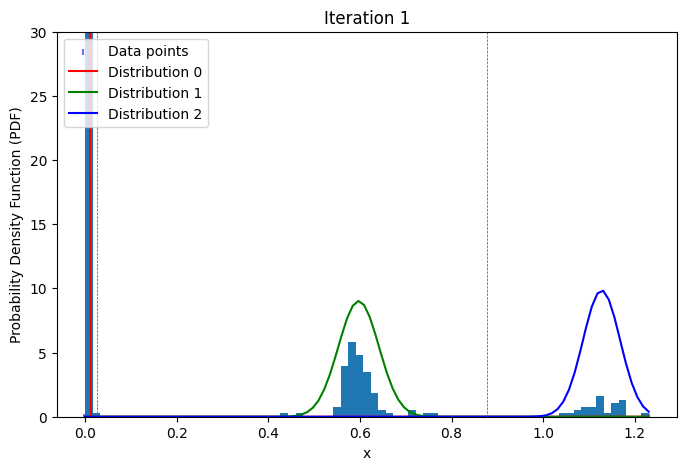

KIR2DS2 [0.025248866103641854, 0.8774895662603311]
KIR2DL4


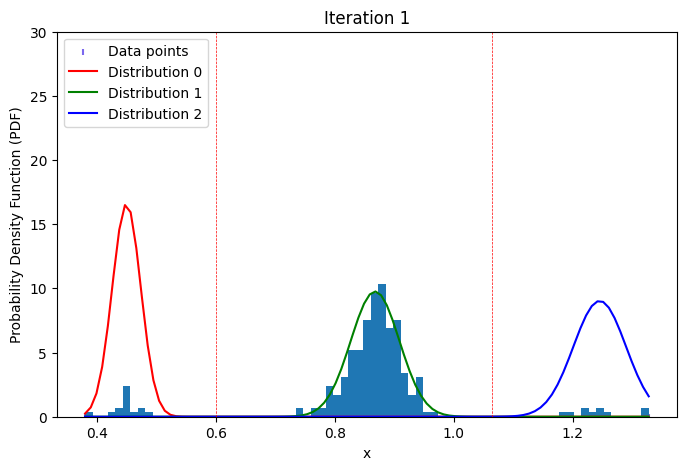

KIR2DL4 [0.5995979092680053, 1.0636978660198526]
KIR3DL1


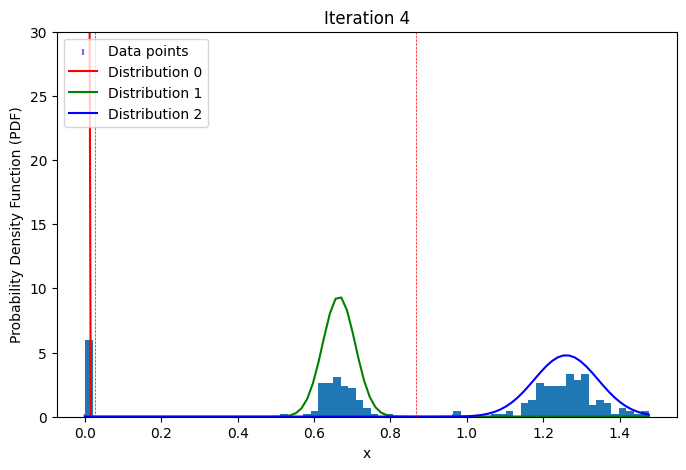

KIR3DL1 [0.02649180055239727, 0.866671490648511]
KIR3DS1


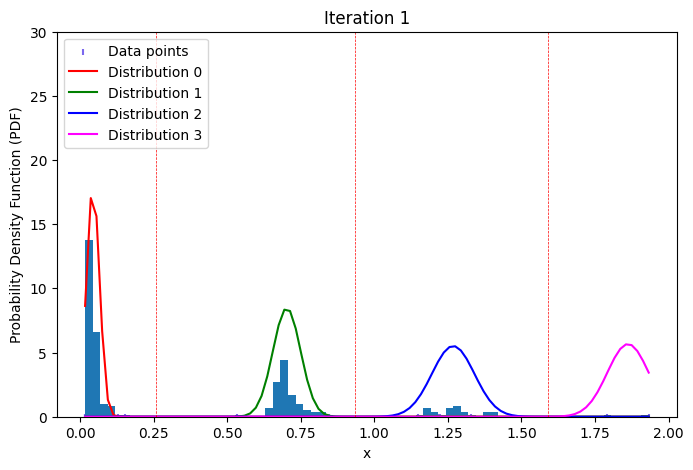

KIR3DS1 [0.25636787373432035, 0.9344950467555708, 1.5903475148719082]
KIR2DL2


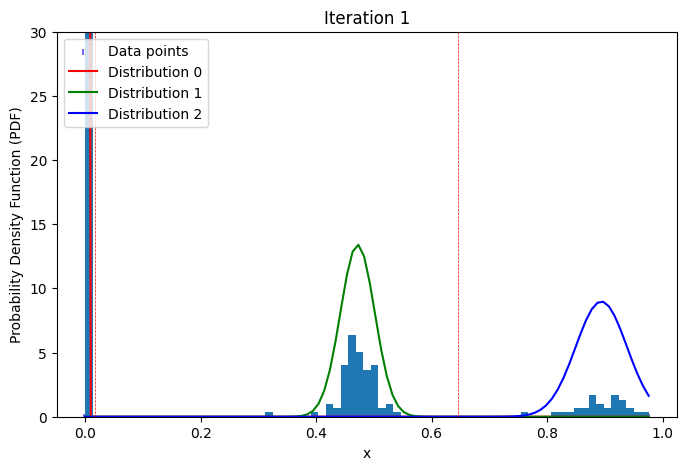

KIR2DL2 [0.016688561088248805, 0.6455347959555763]
KIR3DL2


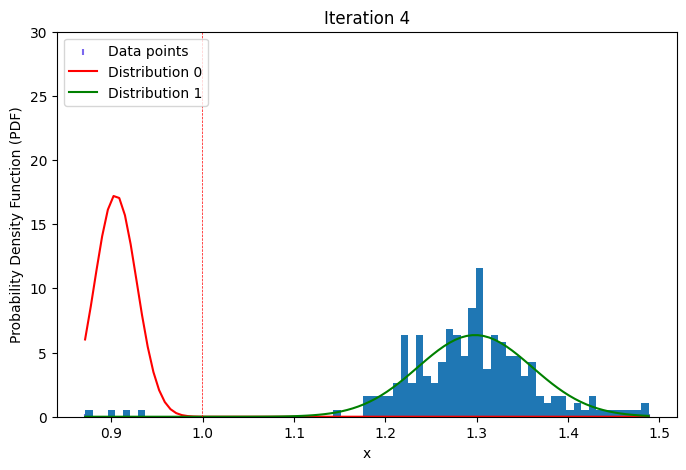

KIR3DL2 [0.9989942009320248]
KIR2DS4


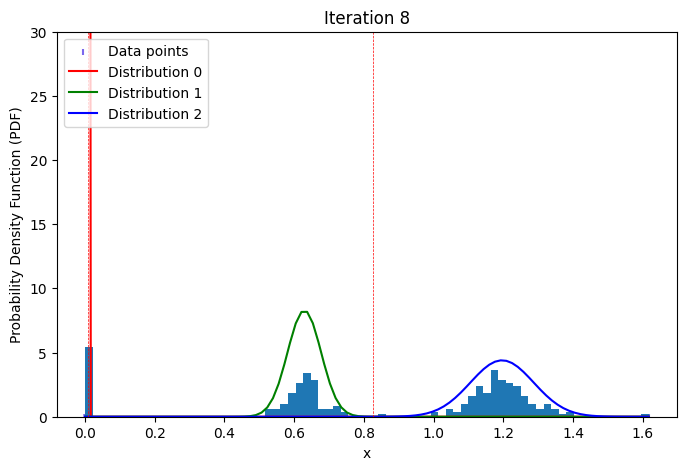

KIR2DS4 [0.008760822422648263, 0.826623425117716]
KIR2DL1


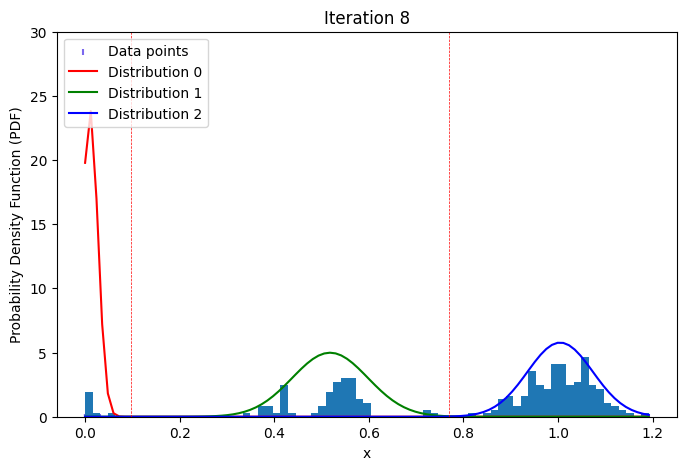

KIR2DL1 [0.0964486759689705, 0.7693256926573637]
KIR2DS1


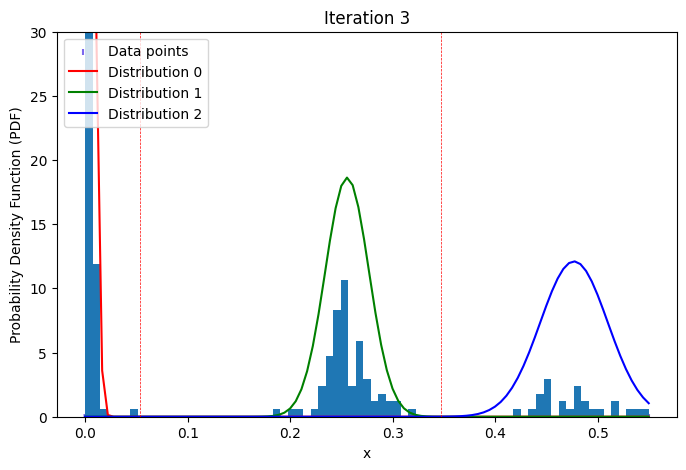

KIR2DS1 [0.05334386995725986, 0.34743492924245406]
KIR2DL5


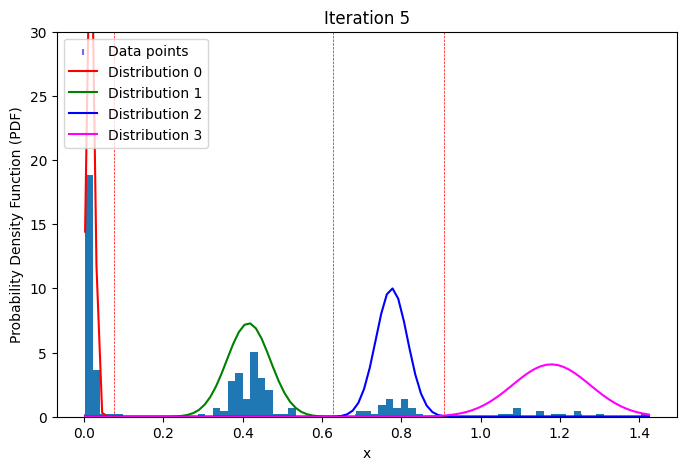

KIR2DL5 [0.07668837446967652, 0.6288460626522757, 0.9079788202284771]


In [7]:
for i in KIR:
    X=B["{}".format(i)].to_numpy()
    X.sort()
    def main(X):

        n_components=gauss.BIC_gmm(X)
        X.sort()
        low_prob_proportion=len(X)
        while n_components<6:
            em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
            low_prob_proportion=gauss.check_prob2(pxj,em)
            if low_prob_proportion>=(0.03*len(X)):
                n_components=n_components+1
            elif gauss.check_mean_dis(em)==False:
                n_components=n_components-1
            else:
                break
        return(em)
    
    em=main(X)
    threholds=gauss.findThreshold2(em)
    print(i)
    gauss.PlotGMM(X,em,50,threholds,30)
    print(i,threholds)



In [57]:
# KIR with 4 number of components
KIR2DS3_data=B["KIR2DS3"].to_numpy()

KIR2DS3_data.sort()

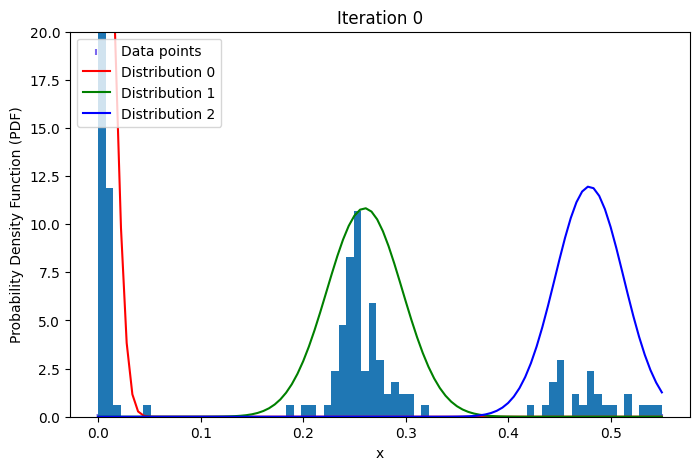

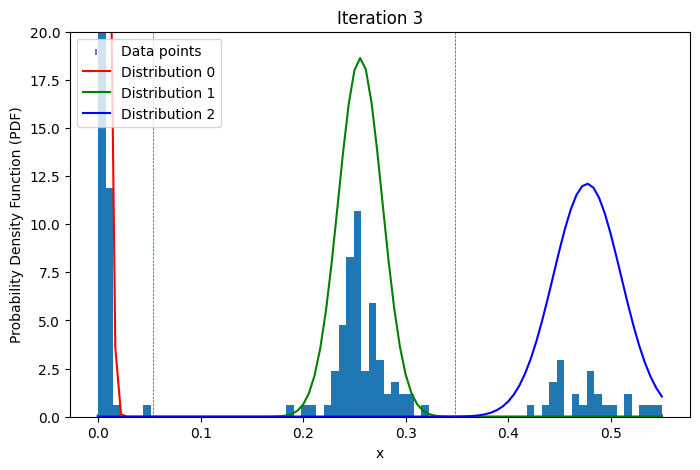

[{'Mean': 0.0039514586396841266,
  'Variance': 2.6229314672480448e-05,
  'Weight': 0.5521739126772349},
 {'Mean': 0.2554993016965426,
  'Variance': 0.00045840937729610637,
  'Weight': 0.3347819763869724},
 {'Mean': 0.4767652279677343,
  'Variance': 0.0010858231181056805,
  'Weight': 0.11304411093579278}]

In [23]:
KIR2DS1=B["KIR2DS1"].to_numpy()
KIR2DS1.sort()

def main(X):

    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob_proportion=len(X)
    while n_components<6:
        em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
        low_prob_proportion=gauss.check_prob2(pxj,em)
        if low_prob_proportion>=(0.05*len(X)):
            n_components=n_components+1
        elif gauss.check_mean_dis(em)==False:
            n_components=n_components-1
        else:
            break
    return(em)

n_components=gauss.BIC_gmm(KIR2DS1)
em_KIR2DS1,pxj_KIR2DS1=gauss.EMGMM_varconstraint(KIR2DS1,3,[])
t_KIR2DS1=gauss.findThreshold2(em_KIR2DS1)
gauss.PlotGMM(KIR2DS1,em_KIR2DS1,10,t_KIR2DS1,20)

gauss.check_mean_dis(em_KIR2DS1)
em_KIR2DS1[-1]

In [ ]:
KIR3DP1_

### Use sklearn.mixture.GaussianMixture

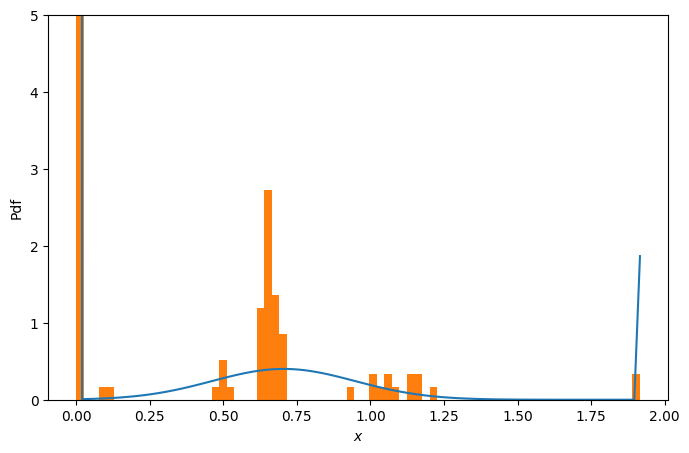

In [4]:
X=KIR2DS3_data
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N=np.arange(1, 5)
models=[None for i in range(len(N))]

for i in range(len(N)):
    models[i]=GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC=[m.aic(X) for m in models]
BIC=[m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
# M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
# log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
# resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
# pdf2=np.exp(log_prob2)


# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.ylim(0,5)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()


### Number of components adjustment (lots of data having low likelihood)

In [5]:
def check_prob2(pxj,iteration_data):
    
    last_iter=iteration_data[-1]
    # Rearrange array into individual likelihoof of each data points
    prob_indv= [None for i in range(len(pxj[0]))]
    for i in range(len(pxj[0])):
        prob_indv[i]=[pxj[j][i] for j in range (len(pxj))]

    # Calculate the minimum likelihood for each gaussian (99.7%)
    min_likelihood=list()
    for j in range(len(last_iter)):
        indv_likelihood=gauss.GaussianPDF((last_iter[j]['Mean']+(2.967738*np.sqrt(last_iter[j]['Variance']))),last_iter[j]['Mean'],last_iter[j]['Variance'])
        min_likelihood.append(indv_likelihood)
    
    # Create list of elements that have high likelihood of belonging to any gaussian
    highprob=list()
    for i in range (len(pxj[0])):
        indv_high_prob=[l1 for l1,l2 in zip(prob_indv[i],min_likelihood) if l1>l2]
        highprob.append(indv_high_prob)
    
    print(min_likelihood)
    # Identify the one with no adequate likelihood of belonging to any gaussian
    n_lowprob=list()
    for i in range(len(highprob)):
        if highprob[i]==[]:
            n_lowprob.append(i)

    return (len(n_lowprob))

In [5]:
em_KIR2DS3,pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),[])

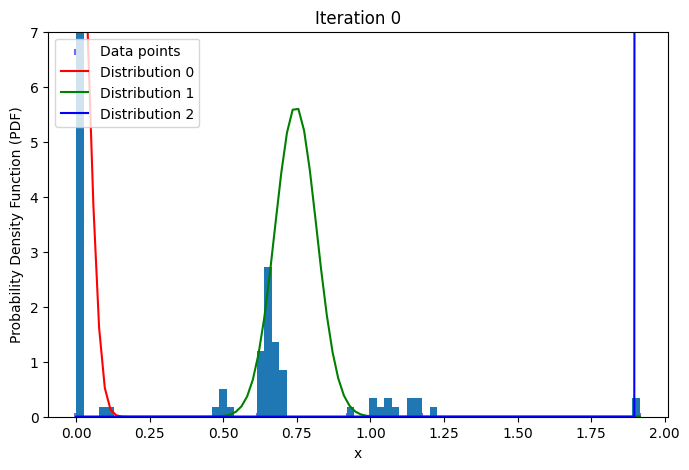

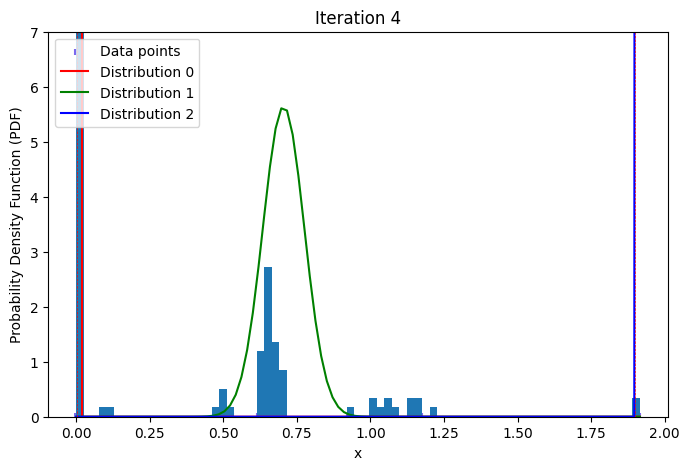

In [7]:
# Plot
t_KIR2DS3=gauss.findThreshold2(em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,em_KIR2DS3,10,t_KIR2DS3,7)

In [8]:
KIR2DL3_data=B["KIR2DL3"].to_numpy()
KIR2DL3_data.sort()

In [9]:
em_KIR2DL3,pxj_2DL3=gauss.EMGMM_varconstraint(KIR2DL3_data,gauss.BIC_gmm(KIR2DL3_data),[])

In [10]:
def EM(X):
    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob= len(X)
    # Check if more than 5% of the data points has low likelihood of being generated by any gaussians given the parameters of the gaussians
    while low_prob>=(0.05*len(X)):
        em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
        low_prob=gauss.check_prob2(pxj,em)
        n_components=n_components+1
    return (em)
    

In [11]:
def EM2(X):
    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob_proportion=len(X)
    while n_components<6:
        em,pxj=gauss.EMGMM_varconstraint(X,n_components,[])
        low_prob_proportion=gauss.check_prob2(pxj,em)
        if low_prob_proportion>=(0.05*len(X)):
            n_components=n_components+1
        elif gauss.check_mean_dis(em)==False:
            n_components=n_components-1
        else:
            break
    return(em)

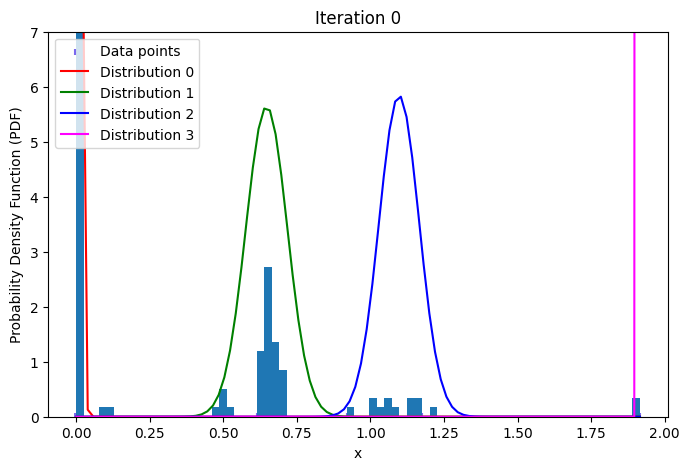

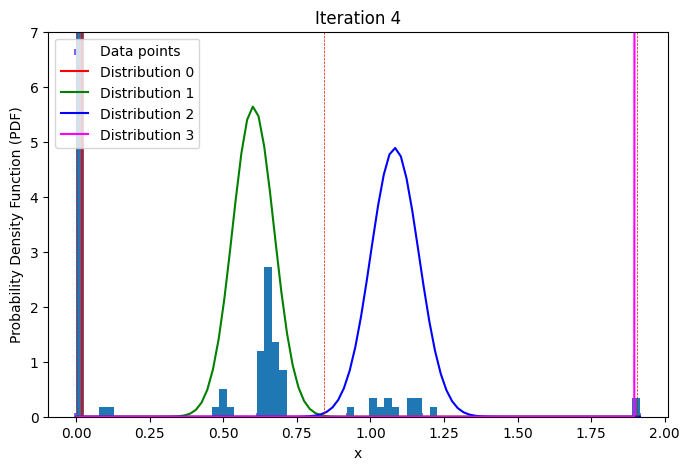

In [12]:
new_em_KIR2DS3=EM2(KIR2DS3_data)
t_KIR2DS3=gauss.findThreshold2(new_em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,new_em_KIR2DS3,10,t_KIR2DS3,7)

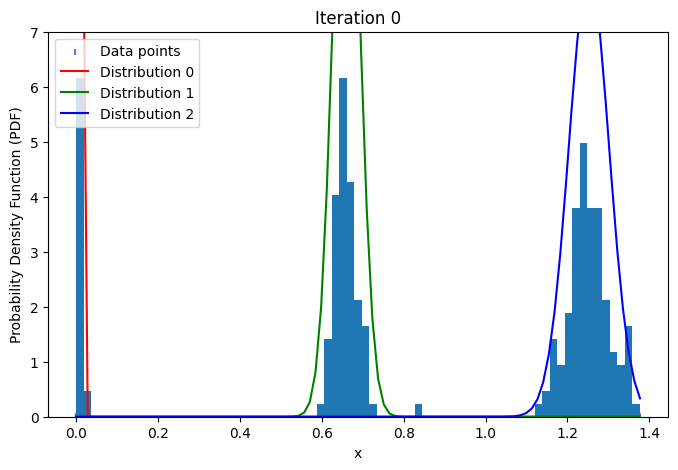

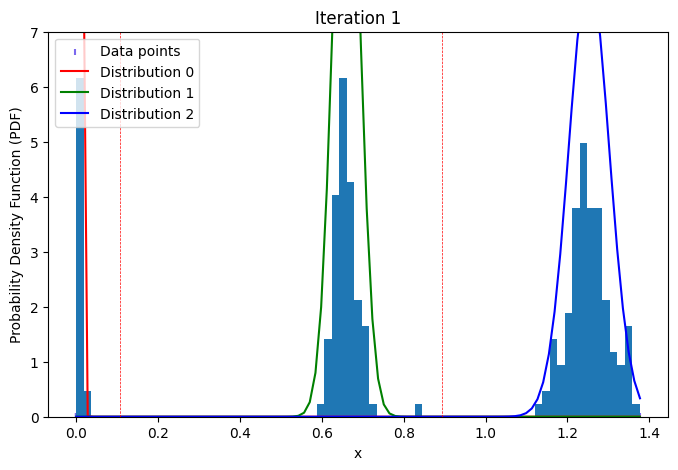

In [13]:
new_em_KIR2DL3=EM2(KIR2DL3_data)
t_KIR2DL3=gauss.findThreshold2(new_em_KIR2DL3)
gauss.PlotGMM(KIR2DL3_data,new_em_KIR2DL3,10,t_KIR2DL3,7)

### Number of components adjustments (mean to close together)

In [15]:
em_KIR2DS3[-1]

[{'Mean': 0.00023312018674629138,
  'Variance': 7.55965290784572e-08,
  'Weight': 0.7478260869567422},
 {'Mean': 0.7047073630372533,
  'Variance': 0.005,
  'Weight': 0.24347826086934482},
 {'Mean': 1.91535409239478,
  'Variance': 1.0654519368042196e-06,
  'Weight': 0.008695652173913044}]

In [14]:
# Calculate the distance between the means
def check_mean_dis(iteration_data):
    means_list=list()
    for i in range (len(iteration_data[-1])):
        means_list.append(iteration_data[-1][i]['Mean'])
    
    means_list.sort()
    print("Means: ", means_list)
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    print("Distance between means :",means_diff)

    def all_meansdiff(means_diff):
        for i in means_diff:
            if i <0.4:
                return False
        return True
    return (all_meansdiff(means_diff))

# # Reduce number of components if the distance is less than 0.4
# if all_meansdiff(means_diff)==False:
#     index=index-1

### Test weird case where n_components=5

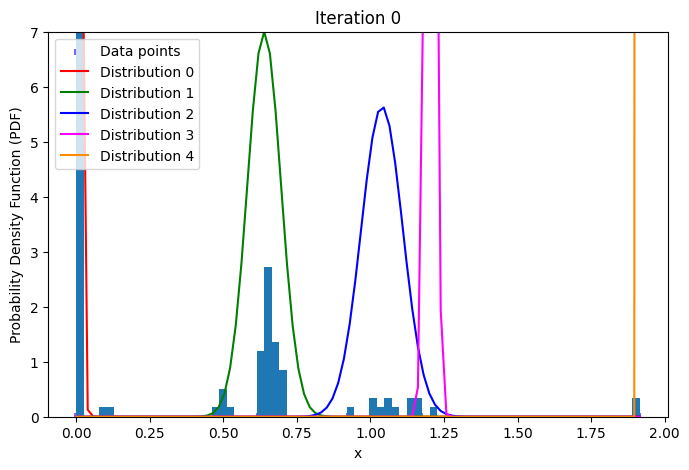

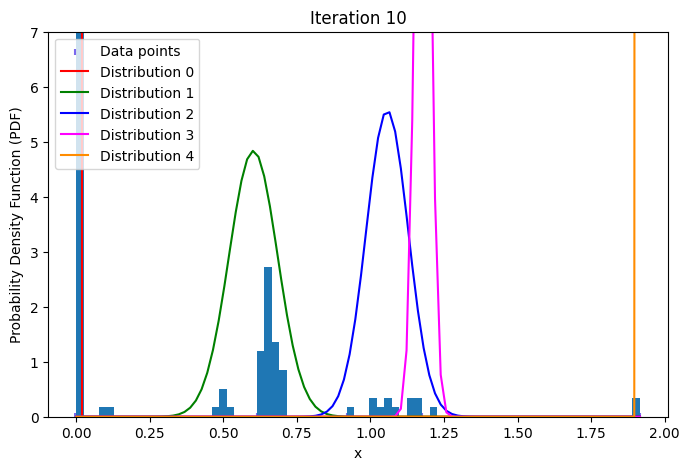

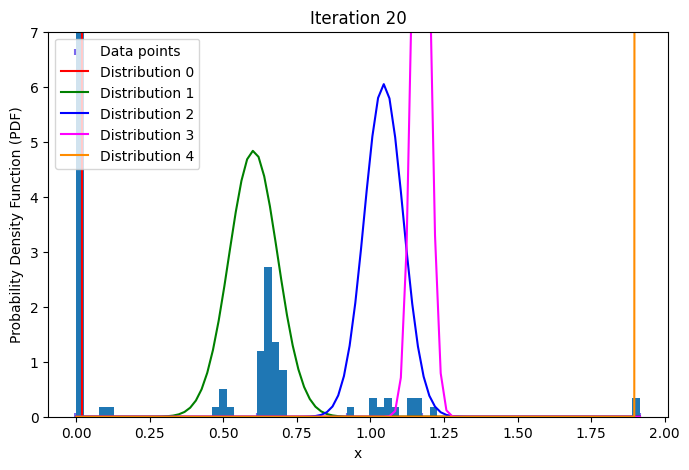

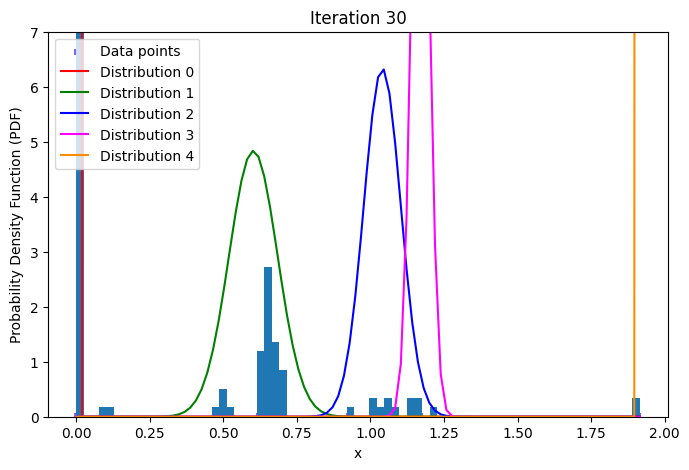

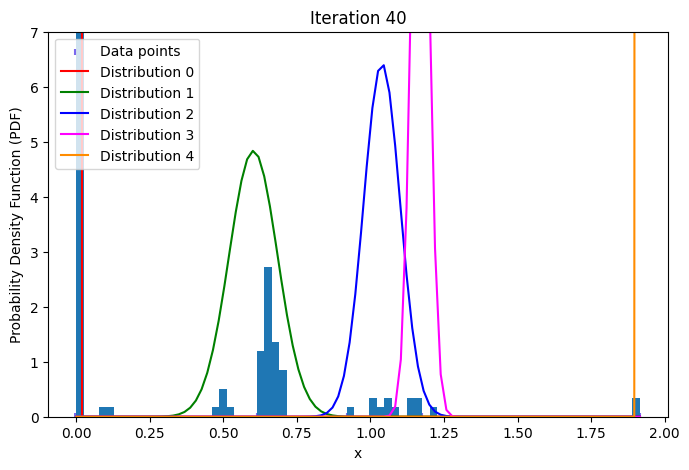

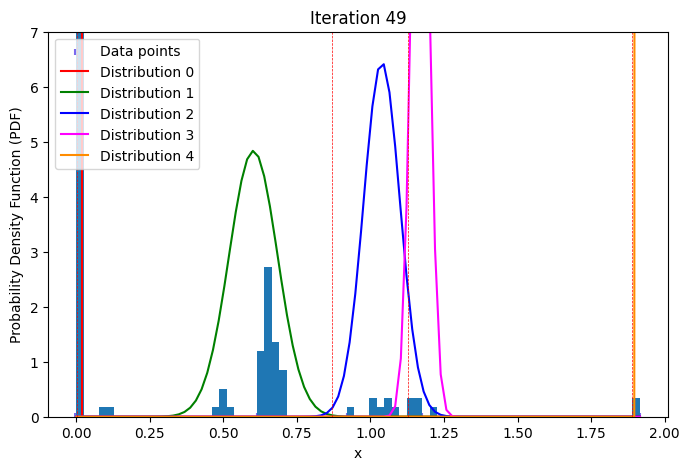

In [15]:
weird_em_2DS3,weird_pxj_2DS3=gauss.EMGMM_varconstraint(KIR2DS3_data,5,[])
weird_t=gauss.findThreshold2(weird_em_2DS3)
gauss.PlotGMM(KIR2DS3_data,weird_em_2DS3,10,weird_t,7)